In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [1]:
import os
working_dir = os.getcwd()

# Import data from CSV file

In [3]:
path = working_dir + '/data.csv'
data = pd.read_csv(path , encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

This dataset has the following columns:
- Impressions: Number of impressions in a post (Reach)
- From Home: Reach from home
- From Hashtags: Reach from Hashtags
- From Explore: Reach from Explore
- From Other: Reach from other sources
- Saves: Number of saves
- Comments: Number of comments
- Shares: Number of shares
- Likes: Number of Likes
- Profile Visits: Numer of profile visits from the post
- Follows: Number of Follows from the post
- Caption: Caption of the post
- Hashtags: Hashtags used in the post

#### Look if the dataset has any null value

In [4]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
# Drop null values
data = data.dropna()

In [6]:
# Look the insights of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### Distributions of impressions

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_91927/127269708.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


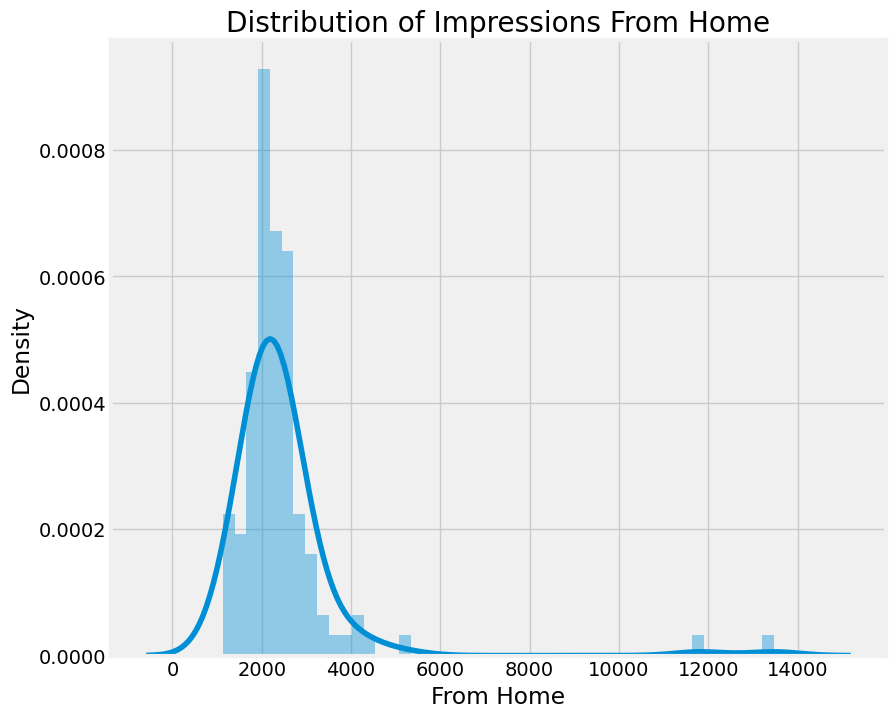

In [7]:
# Look the distribution of impressions received from home
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

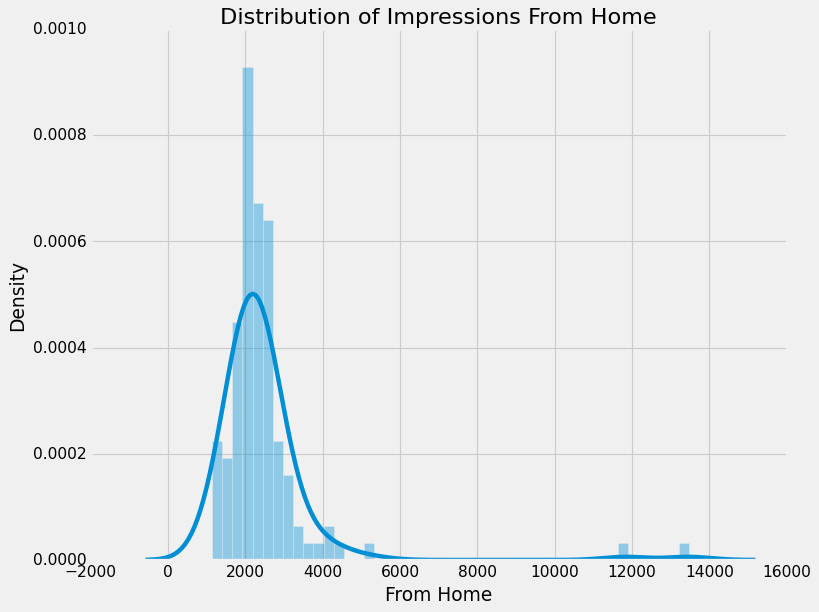

In [41]:
# Look the distribution of impressions received From Home
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

Impressions (reach) From Home section on Instagram shows how much this person's posts reach his followers. Looking at the impressions from home, it can be said it's hard to reach all his followers daily.

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_91927/1143994185.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


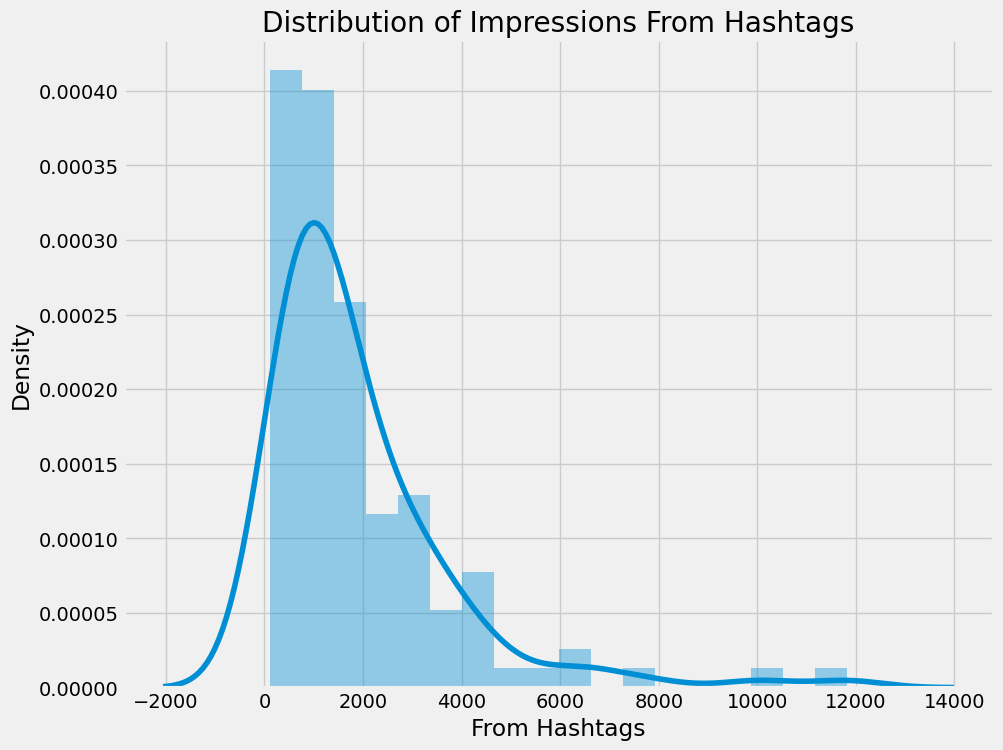

In [9]:
# Look the distribution of impressions received from hashtags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

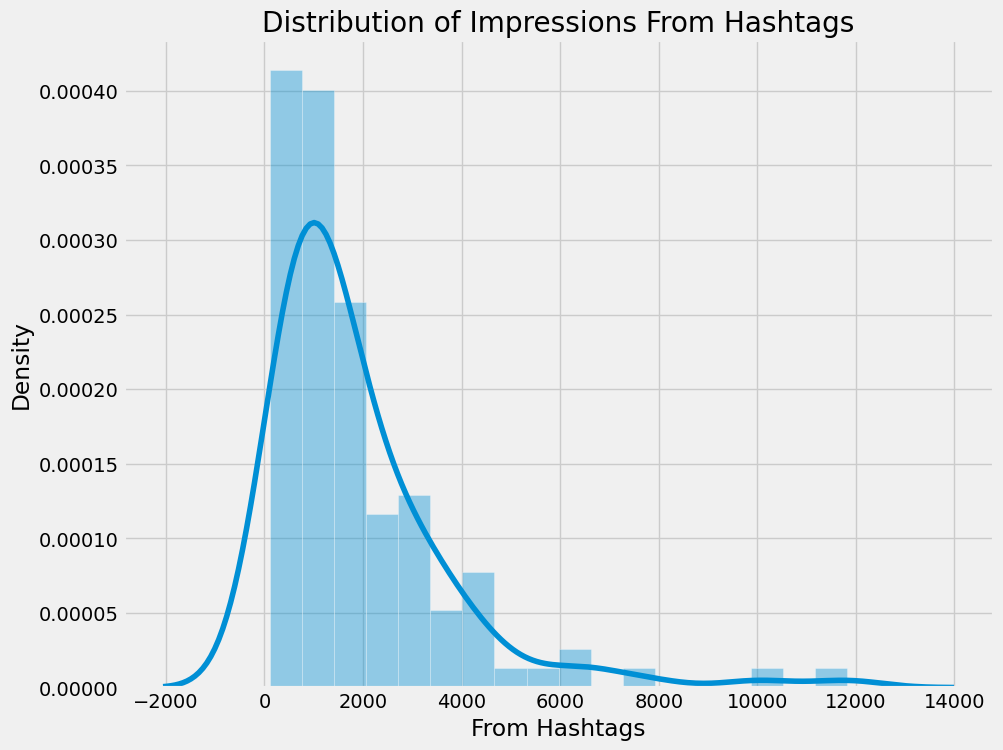

In [10]:
# Look the distribution of impressions received from hashtags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags. 

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_91927/1483066323.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


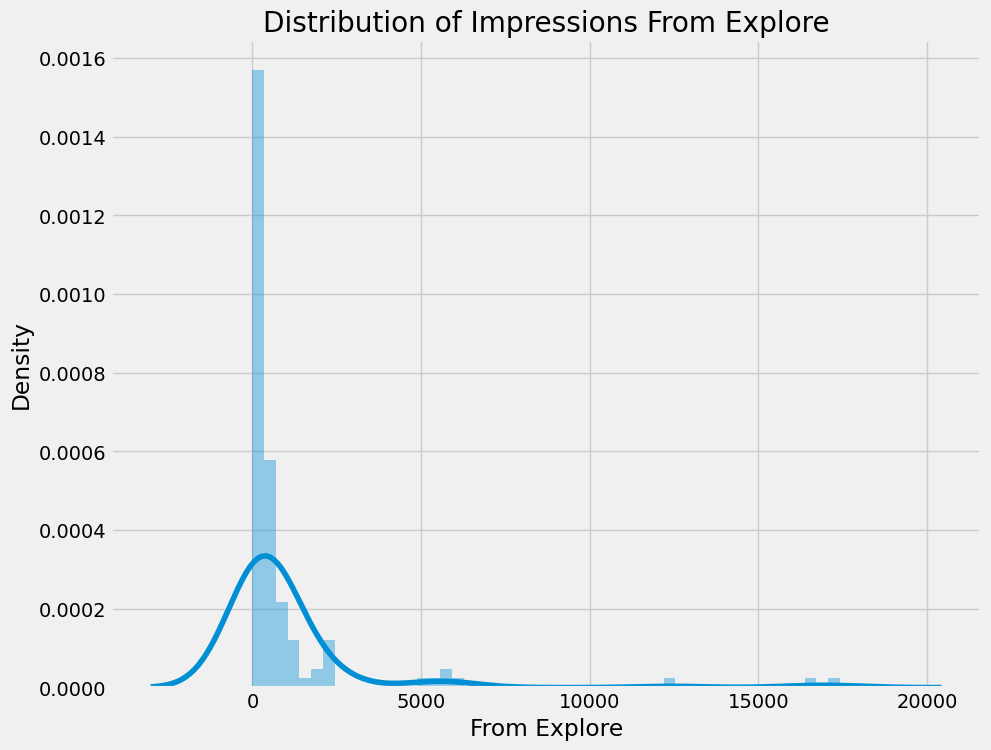

In [11]:
# Look the distribution of impressions received from explore
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

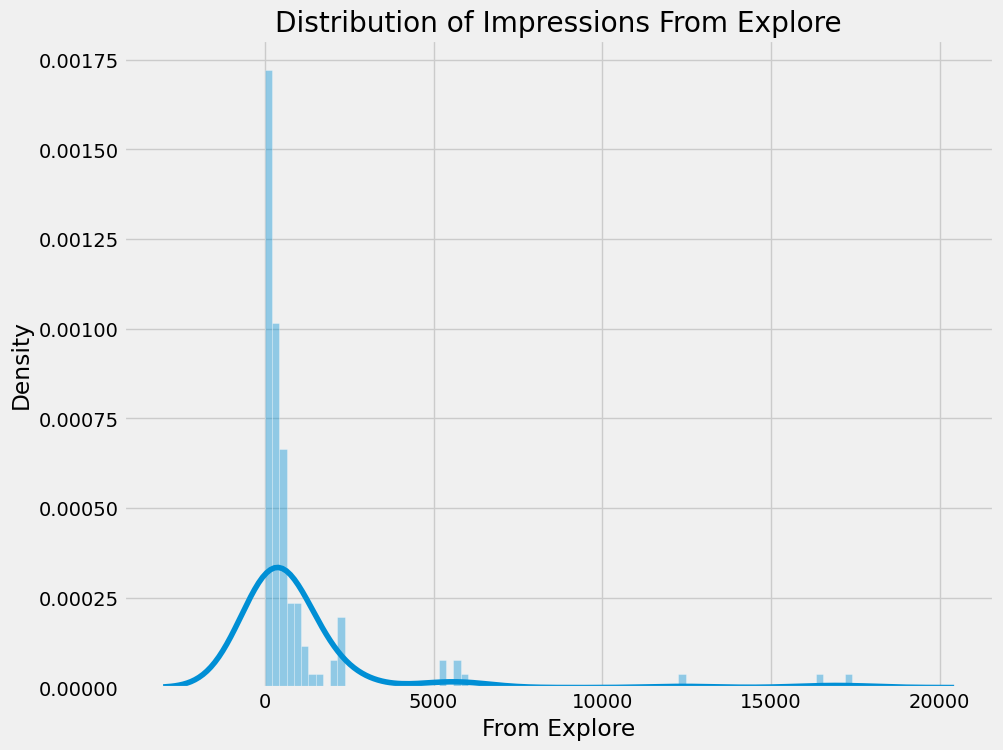

In [12]:
# Look the distribution of impressions received from explore section
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions this person has received from the explore section, can be said that Instagram does not recommend his posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach he receives from hashtags.

### Percentage of impressions this person gets from various sources on Instagram

In [46]:
# Percentage of impressions this person gets from various sources on Instagram
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', "From Hashtags", 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

The donut plot shows that almost 45 percent of the reach is from his followers, 33.6 percent is from hashtags, 19.2 percent is from the explore section, and 3.05 percent is from other sources.

### Analyzing Content

Understand the kind of content this person posts on Instagram

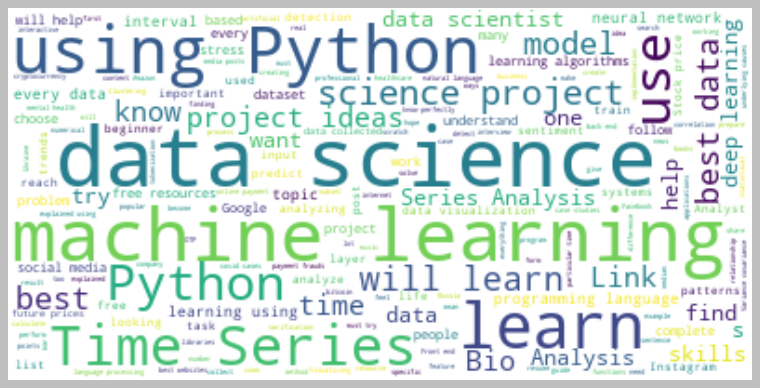

In [14]:
# Wordcloud of the caption column to look at the most used words in the caption of this person's Instagram posts
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


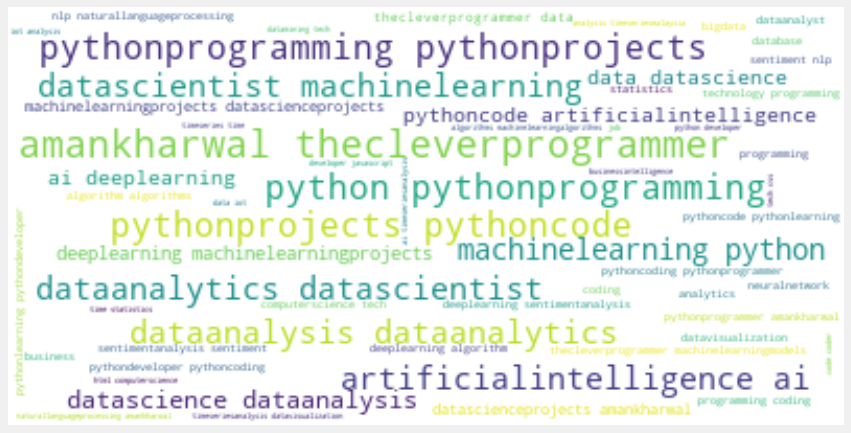

In [47]:
# Wordcloud of the hashtags column to look at the most used hashtags in this person's Instagram posts
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analyzing Relationships

Find the most important factors of this person's Instagram reach. This helps us in understanding how the Instagram algorithm works.

In [17]:
# Relationship between the number of likes and the number of impressions on this person's Instagram posts
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach this person got on Instagram. 

In [19]:
# Relationship between the number of comments and the number of impressions on this person's Instagram posts
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

It looks like the number of comments we get on a post doesn’t affect its reach. 

In [50]:
# Relationship between the number of shares and the number of impressions on this person's Instagram posts
figure = px.scatter(data_frame=data, x="Impressions", y="Shares",
                   size="Shares", trendline="ols",
                   title="Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

In [21]:
# Relationship between the number of saves and the number of impressions on this person's Instagram posts
figure = px.scatter(data_frame=data, x="Impressions", y="Saves",
                   size="Saves", trendline="ols",
                   title="Relationship Between Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times his post is saved and the reach of his Instagram post.

### Correlation of all columns with the Impressions column

In [24]:
correlation = data.corr(numeric_only=True)
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


More likes and saves will help this person gets more reach on Instagram. The higher number of shares will also help this person gets more reach, but a low number of shares will not affect his reach either.

### Analyzing Conversion Rate

In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100.

In [25]:
converstion_rate = (data["Follows"].sum()/data['Profile Visits'].sum())*100
print(converstion_rate)

41.00265604249668


The conversation rate of this person's Instagram account is 41% which sounds like a very good conversation rate.

### Relationship between the Total Profile Visits and the Number of Followers Gained from all profile visits

In [26]:
figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows",
                   size="Follows", trendline="ols",
                   title="Relationship Between Profile Visits and Followers Gained")
figure.show()

### Instagram Reach Prediction Model

Train a machine learning model to predict the reach of an Instagram post.

In [27]:
# Split the data into training and test sets before training the model
x = np.array(data[["Likes", "Saves", "Comments", "Shares",
                  "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42) # Controls the shuffling applied to the data before applying the split

In [33]:
x_shape = x.shape
y_shape = y.shape
print("X shape:", x_shape)
print("Y shape:", y_shape)

X shape: (119, 6)
Y shape: (119,)


In [37]:
y.reshape(x_shape[0])

array([ 3920,  5394,  4021,  4528,  2518,  3884,  2621,  3541,  3749,
        4115,  2218,  3234,  4344,  3216,  9453,  5055,  4002,  3169,
        6168,  2407,  2064,  3973,  7281,  3052,  4628,  4082,  5394,
        2766,  3924,  3015,  6666,  3854,  4355,  4343,  6108,  2523,
        2327,  3990,  2191,  1941, 16062,  4998,  4289,  3880,  3786,
        4298,  3630,  2826,  7407, 10386,  2998,  7018,  2941,  6432,
       10667,  3988,  4978,  3388,  4467,  3246,  5072,  6339,  4239,
        3454,  7571,  3333,  3818, 10933,  5058,  3601,  3480,  3525,
        3606,  5542,  6559,  3623, 10493,  4446,  2957,  5538,  4681,
        5273,  5055,  4002,  3169,  6168,  2407,  3630,  2826,  7407,
       10386,  2998,  3052,  4628,  4082,  5394,  2766,  3924,  3015,
        5409,  5323,  8001,  4150,  4609,  6348, 11068,  7231, 17396,
        6814, 17713,  5563,  4842, 11149, 10206, 13700,  5731,  4139,
       32695, 36919])

### Learn a machine learning model

In [38]:
# Train a machine learning model to predict the reach of an Instagram post
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8834844080511782

### Predict the reach of an Instagram post by giving inputs to the machine learning model

In [39]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10593.97430338])

Given the aforementioned array, there would be 10593 impressions according to the prediction carried out